## Observations and Insights 

In [ ]:
# Obeservations: 
    
# 1.  Based of the given data one could come to the conclusion that the best preforming drug is Capomulin. Over time the mice that
#     were treated with this drug have seen decreases in tumor volume over time.

# 2. The test were split almost evenly between the male and female sexes of the subject. This will help the strengthen a case for the
#    most effective drug. Which comes out on top during the tests can also have the claim of it not only working mostly for females but,
#    that males could also benefit from using the drug as well.

# 3. One could come to the conclusion that the weight of the subject directly conicides with the size of the tumor. 
#    The larger the subject the larger the tumor for that subject. 
#    This can be visually noted by the scatter plot.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how= "left", on = 'Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice = len(combined_data['Mouse ID'].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ID




array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID']=='g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data= combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ID)==False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

cleaned_data_mouse = len(cleaned_data['Mouse ID'].unique())
cleaned_data_mouse

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = cleaned_data.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variance = cleaned_data.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
std_dev = cleaned_data.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem = cleaned_data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_data1= pd.DataFrame({'Mean': mean,
                             'Median' : median,
                            'Variance' : variance,
                            'Standard Deviation' : std_dev,
                            'SEM' : sem})
summary_data1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_data2 = cleaned_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
summary_data2                                                       

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

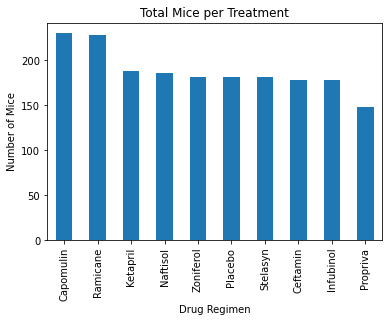

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Drug_count_df = cleaned_data["Drug Regimen"].value_counts()
Drug_count_df.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Mice per Treatment")
plt.show



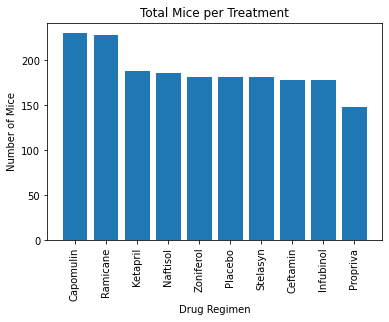

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(Drug_count_df.index.values, Drug_count_df.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Mice per Treatment")
plt.show()


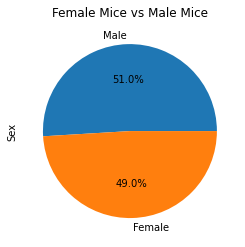

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Male_female_df = cleaned_data["Sex"].value_counts()
Male_female_df.plot(kind='pie', title= "Female Mice vs Male Mice", autopct='%1.1f%%')
plt.show()


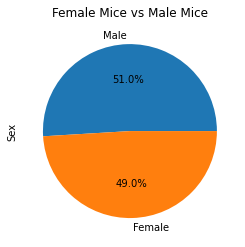

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Male_female_df.values, labels=Male_female_df.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Female Mice vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=cleaned_data.groupby('Mouse ID').max()['Timepoint']
max_tumor=max_tumor.reset_index()
max_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data=max_tumor.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how='left')
merged_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartile = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartile[.25]
    upperq = quartile[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq - (1.5*iqr)
    outlier = tumor_volume.loc[(tumor_volume < lowerbound) | (tumor_volume > upperbound)]
    print(f"{drug} outlier: {outlier}")

Capomulin outlier: 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
124    33.329098
162    46.539206
163    32.377357
169    41.581521
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane outlier: 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol outlier: 0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.22

<function matplotlib.pyplot.show(close=None, block=None)>

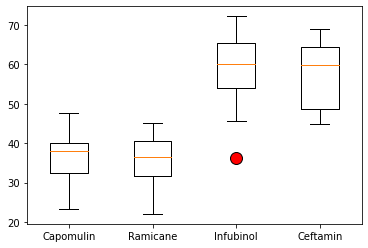

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
output = dict(markerfacecolor="red", markersize = 12)
plt.boxplot(tumor_vol_data, labels=treatment, flierprops=output)
plt.show

## Line and Scatter Plots

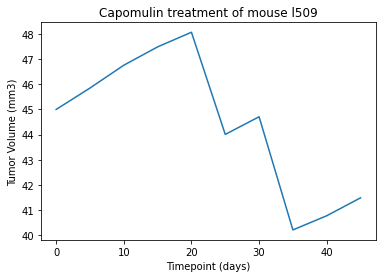

In [89]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]
capomulin
mouse_cap_data = capomulin.loc[capomulin['Mouse ID']=="l509"]
mouse_cap_data
x = mouse_cap_data['Timepoint']
y = mouse_cap_data['Tumor Volume (mm3)']
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")


plt.plot(x,y)

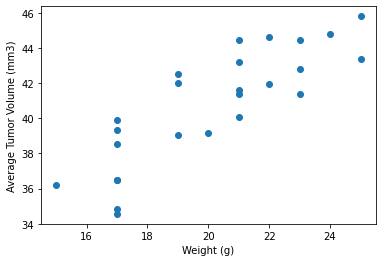

In [90]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_stats = capomulin.groupby('Mouse ID').mean()
plt.scatter(avg_stats['Weight (g)'],avg_stats['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

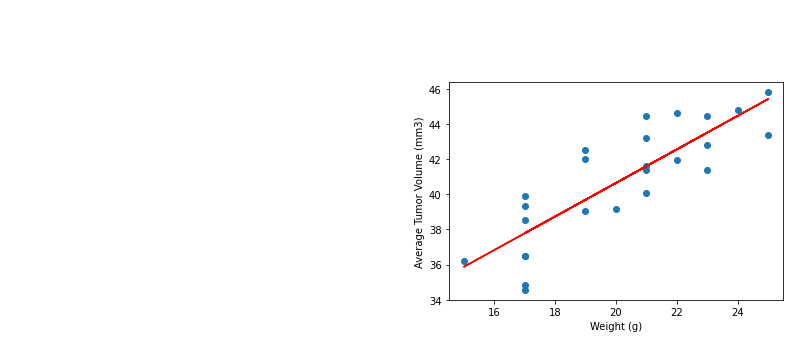

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = avg_stats['Weight (g)']
y_values = avg_stats['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()